In [1]:
from importlib import reload
import time
import matplotlib.pyplot as plt

In [2]:
from matgen import base, matutils

Load complex from .tess file

In [23]:
reload(matutils)

<module 'matgen.matutils' from 'C:\\Users\\Oleg\\Documents\\GitHub\\Voronoi_DCC_Analyser\\matgen\\matutils.py'>

In [24]:
filename = 'tests/test_data/pass1_model_2d.txt'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c)

Complex loaded: 0.4 s
<class CellComplex> 2D
3166 vertices
4747 edges
1582 faces


In [25]:
c.find_neighbors_of_order(7)

In [15]:
c.n_max_order

7

In [6]:
# initial
angles = []
st = time.time()
for i in range(1, 3):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 4584 50.43 s
2 9963 155.77 s


In [16]:
# R calculated once
angles = []
st = time.time()
for i in range(1, 3):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 4584 42.62 s
2 9963 134.76 s


In [26]:
# inv from scipy
angles = []
st = time.time()
for i in range(1, 3):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 4584 41.43 s
2 9963 131.73 s


In [27]:
st = time.time()
for g in c._grains.values():
    g.rot_mtx = g.R
print(len(c._grains), round(time.time() - st, 2), 's')

1582 0.04 s


In [33]:
st = time.time()
angles = []
for g in c._grains.values():
    for n_id in getattr(g, f'n_ids'):
        if g.id < n_id:
            angle = matutils.calculate_disorient(
                g.rot_mtx,
                c._grains[n_id].rot_mtx,
                g.crysym)
            angles.append(angle)
print(len(angles), round(time.time() - st, 2), 's')

4584 42.4 s


In [36]:
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 4584 11.18 s
2 9963 35.43 s
3 16023 74.21 s
4 22305 128.21 s
5 28625 197.48 s
6 34788 281.42 s
7 40448 379.37 s


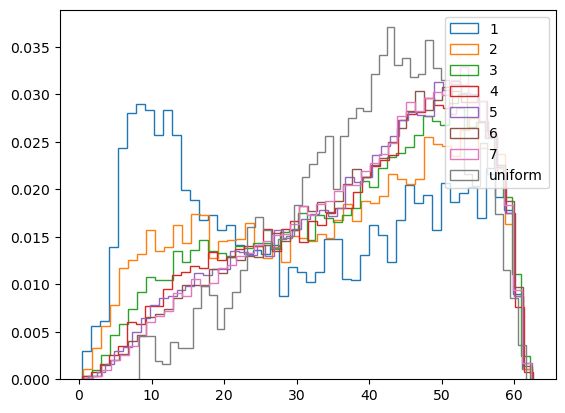

In [37]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

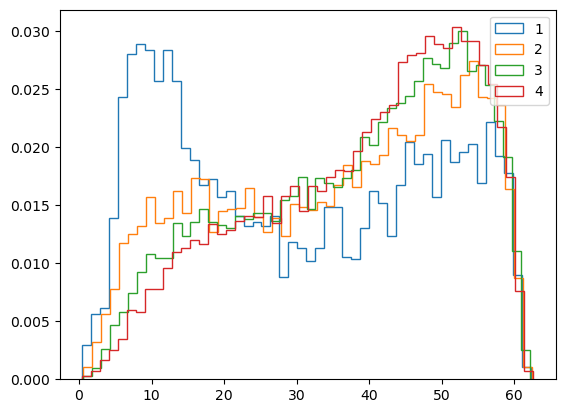

In [234]:
for i in [0, 1, 2, 3]:
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.legend()
plt.show()

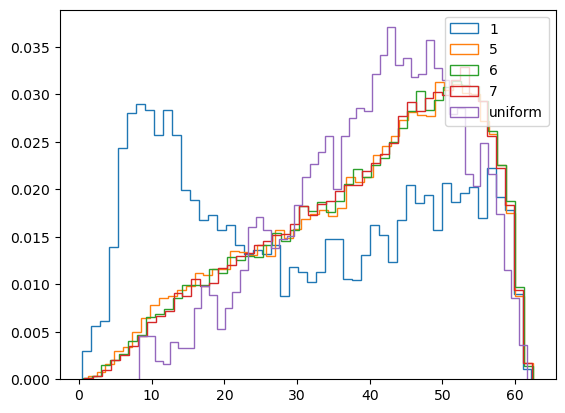

In [38]:
for i in [0, 4, 5, 6]:
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

In [12]:
reload(matutils)

<module 'matgen.matutils' from '/Users/v94623eb2/Documents/Voronoi_DCC_Analyser/matgen/matutils.py'>

## ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/pass1.tess

In [34]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/pass1.tess'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c1 = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c1)

Complex loaded: 0.4 s
<class CellComplex> 2D
1986 vertices
2977 edges
992 faces


In [36]:
c1.set_theta_from_ori()

In [46]:
c1.faces[0].oridesc

'euler-roe:active'

In [40]:
for e in c1.edges[:10]:
    print(e.id, e.theta)

1 14.916357025192234
2 42.154002964134975
3 43.363656492114316
4 36.08474233253777
5 44.213448892380185
6 22.4808068242876
7 44.8641419689645
8 34.45249088010136
9 -1
10 -1


In [42]:
import numpy as np

In [43]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/pass1_ori.txt'
ori_euler = np.loadtxt(filename)

In [44]:
for f, row in zip(c1.faces, ori_euler):
    f.set_crystal_ori(crysym='cubic', oridesc='euler-roe:active', ori_components=tuple(row))

In [45]:
for e in c1.edges[:10]:
    print(e.id, e.theta)

1 14.916357025192234
2 42.154002964134975
3 43.363656492114316
4 36.08474233253777
5 44.213448892380185
6 22.4808068242876
7 44.8641419689645
8 34.45249088010136
9 -1
10 -1


In [ ]:
c1.

In [51]:
c1.find_neighbors_of_order(7)

In [52]:
c1.n_max_order

7

In [53]:
c = c1
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 2858 6.91 s
2 6598 22.84 s
3 11163 49.94 s
4 15992 88.7 s
5 20647 138.38 s
6 24713 198.02 s
7 27827 265.3 s


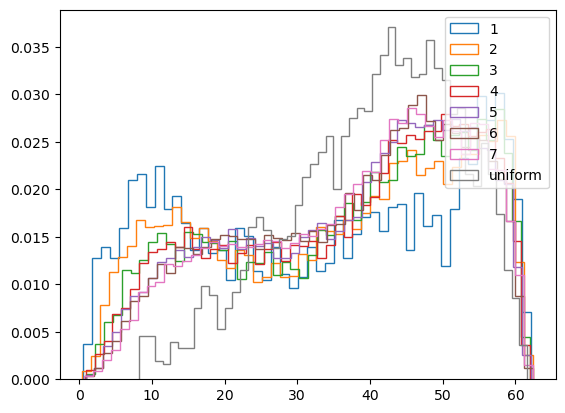

In [54]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

## ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4

In [72]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4/pass4.tess'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c4 = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c4)

Complex loaded: 0.8 s
<class CellComplex> 2D
20568 vertices
30850 edges
10283 faces


In [73]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4/pass4_ori.txt'
ori_euler = np.loadtxt(filename)

In [74]:
for f, row in zip(c4.faces, ori_euler):
    f.set_crystal_ori(crysym='cubic', oridesc='euler-roe:active', ori_components=tuple(row))

In [76]:
c4.find_neighbors_of_order(7)

In [ ]:
c = c4
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 30537 74.65 s
2 69582 243.23 s
3 119255 534.08 s
4 177434 965.48 s
5 242649 1557.63 s


In [ ]:
for e in c4.edges[:10]:
    print(e.id, e.theta)

In [ ]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

## ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8

In [ ]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8/pass8.tess'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c8 = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c8)

In [ ]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8/pass8_ori.txt'
ori_euler = np.loadtxt(filename)

In [ ]:
for f, row in zip(c8.faces, ori_euler):
    f.set_crystal_ori(crysym='cubic', oridesc='euler-roe:active', ori_components=tuple(row))

In [ ]:
c8.find_neighbors_of_order(7)

In [ ]:
c = c8
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

In [ ]:
for e in c8.edges[:10]:
    print(e.id, e.theta)

In [ ]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

Rodrigues

In [ ]:
matutils._R_from_Rodrigues()

In [27]:
c1._faces[1].oridesc

'rodrigues:active'

In [29]:
import numpy as np

In [30]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass1/disorientation_pass1_random.stedge'
rand_dis = np.loadtxt(filename)

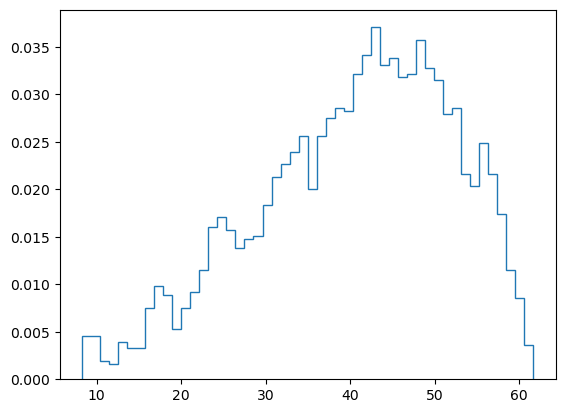

In [33]:
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step')
plt.show()

In [31]:
rand_dis[:10]

array([43.54296548, 49.99181942, 41.75535271, 47.63387008, 33.37465009,
       35.63126552, 46.04333228, 46.69634398, -1.        , -1.        ])

In [7]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass1/pass1_1_rand.tess'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c1_rand = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c1_rand)

Complex loaded: 0.1 s
<class CellComplex> 2D
1986 vertices
2977 edges
992 faces


In [10]:
c1_rand.faces[0].oridesc

'rodrigues:active'

In [227]:
c.find_neighbors_of_order(7)

In [228]:
c.n_max_order

7

In [230]:
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 4584 10.82 s
2 9963 34.19 s
3 16023 72.09 s
4 22305 124.61 s
5 28625 192.12 s
6 34788 274.08 s
7 40448 368.69 s


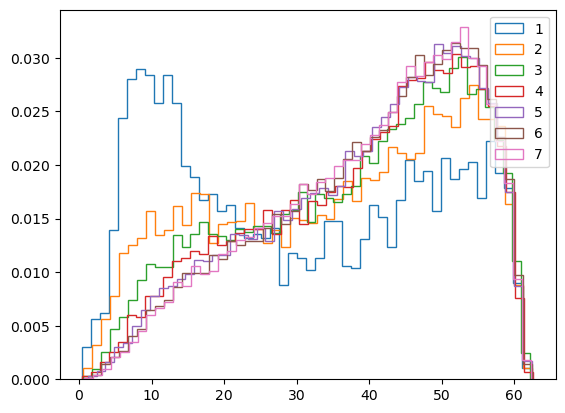

In [232]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.legend()
plt.show()